# Sharpe Ratio and Portfolio Optimisation

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.optimize import minimize
%matplotlib inline

In [2]:
import quandl
quandl.ApiConfig.api_key = 'XXXXXX' 
#quandl.ApiConfig.api_key = 'YOUR API KEY' 

## Import data from Quandl

In [3]:
start = pd.to_datetime('2010-01-01')
end = pd.to_datetime('2018-01-01')

The formula to download data stock from Quandl is " = quandl.get('WIKI/AAPL',start_date=start,end_date=end)".
This will give you all data as below. 
More information on https://www.quandl.com/databases/WIKIP

In [4]:
aapl = quandl.get('WIKI/AAPL',start_date=start,end_date=end)
aapl.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-01-04,213.43,214.50,212.38,214.01,17633200.0,0.0,1.0,27.428730,27.566240,27.293790,27.503268,123432400.0
2010-01-05,214.60,215.59,213.25,214.38,21496600.0,0.0,1.0,27.579091,27.706320,27.405597,27.550818,150476200.0
2010-01-06,214.38,215.23,210.75,210.97,19720000.0,0.0,1.0,27.550818,27.660055,27.084312,27.112585,138040000.0
2010-01-07,211.75,212.00,209.05,210.58,17040400.0,0.0,1.0,27.212826,27.244955,26.865839,27.062465,119282800.0
2010-01-08,210.30,212.00,209.06,211.98,15986100.0,0.0,1.0,27.026481,27.244955,26.867124,27.242385,111902700.0


As we need only the Adj. Close which is the 11th column we put .11 after stock name

In [5]:
# Grabbing a bunch of tech stocks for our portfolio
aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end) 
msft = quandl.get('WIKI/MSFT.11',start_date=start,end_date=end)
goog = quandl.get('WIKI/GOOGL.11',start_date=start,end_date=end)
amzn = quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)

## Compute cumulative returns with adjusted close

In [6]:
for stock_df in (aapl,msft,goog,amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close']/stock_df.iloc[0]['Adj. Close']

As you can see below the first "Normed Return" is 100% and the last is 615%. If you invested the January 4th, 2010 in Apple you would have had a return of 615% the 29th December 2017

In [7]:
aapl.head()

,Adj. Close,Normed Return
Date,,
2010-01-04,27.503268,1.000000
2010-01-05,27.550818,1.001729
2010-01-06,27.112585,0.985795
2010-01-07,27.062465,0.983973
2010-01-08,27.242385,0.990514


In [8]:
aapl.tail()

,Adj. Close,Normed Return
Date,,
2017-12-22,175.01,6.363244
2017-12-26,170.57,6.201809
2017-12-27,170.60,6.202899
2017-12-28,171.08,6.220352
2017-12-29,169.23,6.153087


## Create Portofolio with 4 stocks

In our portfolio we will invest equal amount in each of the 4 stocks which means a balance of 25% in each stock on January 4th 2010. We know create a new column with the allocation per share.
Note the allocation change with the normalised return overtime

In [9]:
for stock_df,allo in zip([aapl,msft,goog,amzn],[.25,.25,.25,.25]):#the allocation can be easily changed in the brackets
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [10]:
goog.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2010-01-04,314.345354,1.000000,0.250000
2010-01-05,312.961081,0.995596,0.248899
2010-01-06,305.071727,0.970499,0.242625
2010-01-07,297.969804,0.947906,0.236976
2010-01-08,301.942066,0.960542,0.240136


Now we create a table with the allocation value of each of our shares and the total allocation value

In [11]:
portfolio_val = pd.concat([aapl['Allocation'],msft['Allocation'],goog['Allocation'],amzn['Allocation']],axis=1)*100

In [12]:
portfolio_val.columns = ['AAPL Pos','MSFT Pos','GOOGL Pos','AMZN Pos']

In [13]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

In [14]:
portfolio_val.tail()

,AAPL Pos,MSFT Pos,GOOGL Pos,AMZN Pos,Total Pos
Date,,,,,
2017-12-22,159.081097,84.988268,85.006823,218.140403,547.216591
2017-12-26,155.045213,84.878939,84.767437,219.708738,544.400326
2017-12-27,155.072482,85.187048,84.318090,220.735624,545.313244
2017-12-28,155.508794,85.196987,83.980086,221.452577,546.138443
2017-12-29,153.827175,85.018085,83.777284,218.347647,540.970192


We underline the balance of 25% in each stock the January 4th, 2010 because this balance is deemed to change if no rebalance of portfolio is done during the period.

As shown below, without rebalancing, Amazon becomes 40.36% of the whole portfolio the December 29th, 2017

In [15]:
portfolio_val.tail(n=1)/5.40970192

,AAPL Pos,MSFT Pos,GOOGL Pos,AMZN Pos,Total Pos
Date,,,,,
2017-12-29,28.435425,15.715854,15.486488,40.362233,100.0


## Chart analysis

Text(0.5,1,'Total Portfolio Value')

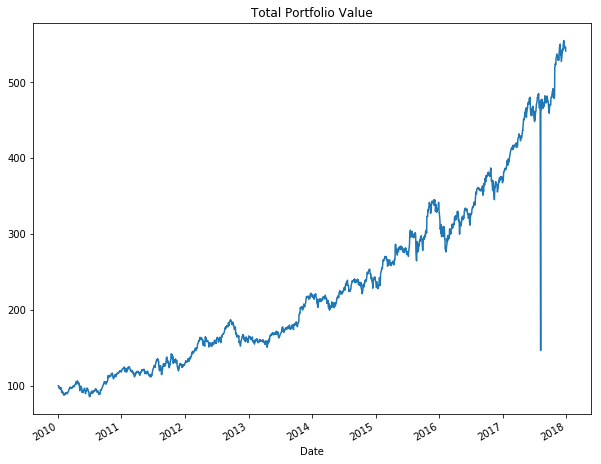

In [16]:
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

*if you see a vertical drop between 2017 and 2018, this is a bug of the library, the drop is unexistant as you can see on the chart below*

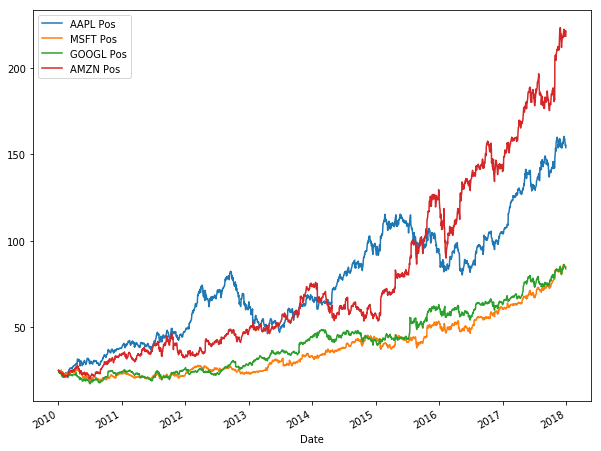

In [17]:
portfolio_val.drop('Total Pos',axis=1).plot(kind='line',figsize=(10,8))

## The Sharpe Ratio

### Daily returns

In [18]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

### Cumulative returns

In [19]:
cum_ret = 100 * (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0] -1 )
print('Our portfolio return between January 2010 and January 2018 is {} percent'.format(round(cum_ret)))

Our portfolio return between January 2010 and January 2018 is 441.0 percent


### Sharpe Ratio

Investopedia defines the Sharpe Ratio as " the average return earned in excess of the risk-free rate per unit of volatility or total risk."
https://www.investopedia.com/terms/s/sharperatio.asp#ixzz59jV7Nr8e 

The Sharpe Ratio is risk return measurement which assumes that volatility is the risk. This has many limitations that will not be covered here but I invite you to have a look on the internet.

Sharpe Ratio = (Mean portfolio return − Risk-free rate)/Standard deviation of portfolio return

Given the current interest rates, we will assume interest rates are equal to zero to simplify the exercise:

Simple Sharpe Ratio = Mean portfolio return /Standard deviation of portfolio return

In order to compute the annual Sharpe ratio we need to multiply the daily Sharpe Ratio by the square root of 252:

Annualized Sharpe Ratio = sqrt(252) * SR

In [20]:
DSSR = portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()

In [21]:
ASSR = DSSR * math.sqrt(252)
print('The Annualised Simplified Sharpe Ratio of our portfolio between January 2010 and January 2018 is {} percent'.format(ASSR))

The Annualised Simplified Sharpe Ratio of our portfolio between January 2010 and January 2018 is 0.49722614958938294 percent


# Portfolio Optimization with the Modern Portfolio Theory


"*Modern portfolio theory (MPT) is a theory on how risk-averse investors can construct portfolios to optimize or maximize expected return based on a given level of market risk, emphasizing that risk is an inherent part of higher reward. According to the theory, it's possible to construct an "efficient frontier" of optimal portfolios offering the maximum possible expected return for a given level of risk. This theory was pioneered by Harry Markowitz in his paper "Portfolio Selection," published in 1952 by the Journal of Finance.*"( Investopedia)
 https://www.investopedia.com/terms/m/modernportfoliotheory.asp#ixzz59jfOowsj 

## Create dataset

In [39]:
portfolio = pd.concat([aapl['Adj. Close'],msft['Adj. Close'],goog['Adj. Close'],amzn['Adj. Close']],axis=1)
portfolio.columns = ['aapl','msft','goog','amzn']

In [40]:
portfolio.head()

,aapl,msft,goog,amzn
Date,,,,
2010-01-04,27.503268,25.153472,314.345354,133.90
2010-01-05,27.550818,25.161599,312.961081,134.69
2010-01-06,27.112585,25.007183,305.071727,132.25
2010-01-07,27.062465,24.748741,297.969804,130.00
2010-01-08,27.242385,24.917785,301.942066,133.52


## Log returns computation

In [41]:
log_ret = np.log(portfolio/portfolio.shift(1))
log_ret.head()

,aapl,msft,goog,amzn
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.001727,0.000323,-0.004413,0.005883
2010-01-06,-0.016034,-0.006156,-0.025532,-0.018282
2010-01-07,-0.001850,-0.010389,-0.023555,-0.017160
2010-01-08,0.006626,0.006807,0.013243,0.026717


## Distribution of log returns

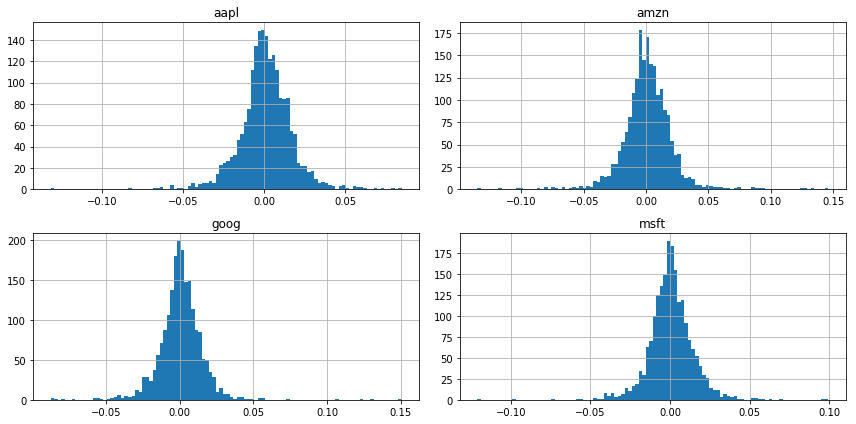

In [42]:
log_ret.hist(bins=100,figsize=(12,6));
plt.tight_layout()

## Summary of log returns

In [43]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
aapl,2009.0,0.000893,0.015949,-0.131875,-0.006884,0.000865,0.009584,0.085022
msft,2011.0,0.000609,0.014033,-0.121033,-0.006682,0.000308,0.007789,0.099413
goog,2011.0,0.000601,0.014951,-0.087493,-0.006390,0.000481,0.008042,0.150645
amzn,2009.0,0.001078,0.019566,-0.135325,-0.008471,0.000865,0.011546,0.146225


## Simulations of Sharpe Ratio

We know run 15,000 simulations with different stocks weights

In [55]:
num_ports = 15000

all_weights = np.zeros((num_ports,len(portfolio.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(4))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

## Computing the Best Sharpe Ratio

In [56]:
sharpe_arr.argmax()

12578

In [57]:
# computing the best Sharpe Ratio ( red dot on chart)
max_sr_ret = ret_arr[12578]
max_sr_vol = vol_arr[12578]

## Plot the simulation

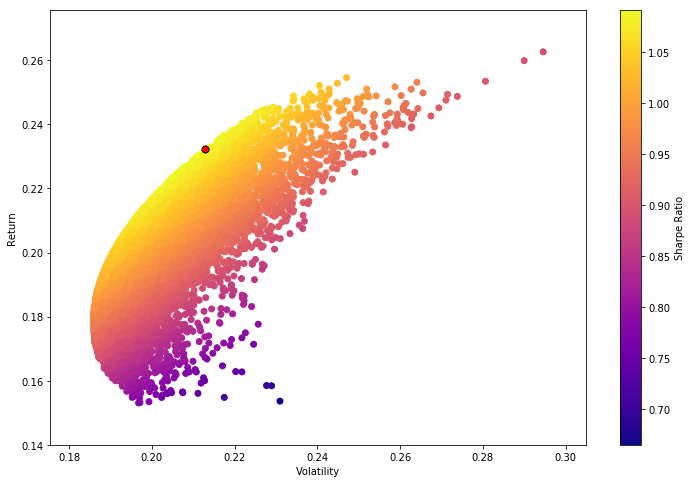

In [58]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max Sharpe Ratio
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')


## Find the most efficient weights

In [59]:
# define a function that returns return, volatility, and Sharpe Ratio given weight
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [60]:
# define a function that provides negative Sharpe Ratio given weights 
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [61]:
# define a function that constraint the total weight to be 1 ( or 100%)
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1

In [62]:
# By convention of minimize function it should be a function that returns zero for conditions
cons = ({'type':'eq','fun': check_sum})

In [63]:
# 0-1 bounds for each weight as you cannot be short on a share or leveraged
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))

In [64]:
# Initial Guess,equal distribution, will be our starting point 
init_guess = [0.25,0.25,0.25,0.25]

In [65]:
# We try to minimize the negative Sharpe Ratio
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

The optimal weight for the 4 stocks ( Apple, Microsoft, Google, and Amazon) in this order are:

In [66]:
opt_results.x

array([ 0.46397495,  0.17528902,  0.        ,  0.36073602])

Now that we know the best weight, we can now the optimised daily return, volatility and Sharpe Ratio ( in this order) with our function get_ret_vol_sr

In [67]:
get_ret_vol_sr(opt_results.x)

array([ 0.22923424,  0.21000847,  1.09154758])